In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

from tensorflow.keras.layers import LeakyReLU, BatchNormalization, Conv2D, Add, Layer, Conv2DTranspose, Activation, ZeroPadding2D, Input
from tensorflow_addons.layers import InstanceNormalization
from keras.models import Model
from keras.activations import *
from keras.layers import *

import matplotlib.pyplot as plt
import numpy as np

import os, random, json, PIL, shutil, re, imageio, glob

/opt/anaconda3/lib/python3.8/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.5.0 and strictly below 2.8.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [3]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print("Device:", tpu_master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print("Number of replicas:", strategy.num_replicas_in_sync)

AUTOTUNE = tf.data.experimental.AUTOTUNE

print(tf.__version__)

Number of replicas: 1
2.8.0


In [47]:
import os
rootProjectPath = os.path.normpath(os.getcwd() + os.sep + os.pardir)
# print(rootProjectPath)
datasetPath = os.path.join(rootProjectPath, "Sample_Data"+os.sep+"Raw")
# print(datasetPath)
monetFilenames = tf.io.gfile.glob(str(datasetPath+os.sep+"monet_tfrec"+os.sep+"*.jpg"))
photoFilenames = tf.io.gfile.glob(str(datasetPath+os.sep+"photo_tfrec"+os.sep+"*.jpg"))
#print(datasetPath)

#get number of images in each category
monet_path=os.path.join(datasetPath, "monet_jpg")
photo_path=os.path.join(datasetPath, "photo_jpg")
print("No of Monet Images {}".format(len(os.listdir(monet_path))))
print("No of Photo Images {}".format(len(os.listdir(photo_path))))

/Users/bensonli/CIS_3715/CIS4496-GANs-Project/Sample_Data/Raw
No of Monet Images 300
No of Photo Images 7038


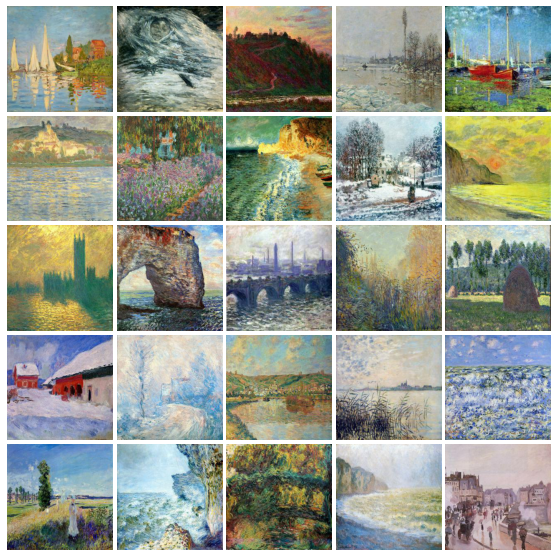

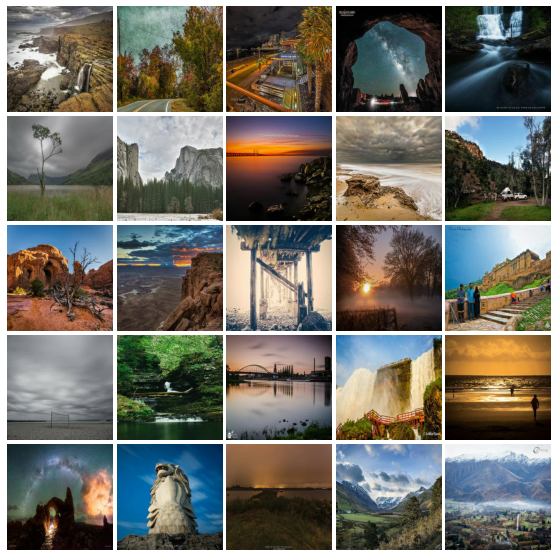

In [74]:
from mpl_toolkits.axes_grid1 import ImageGrid
#create image grids to display some of the monet photos and non-monet photos
fig = plt.figure(1, figsize=(15, 10))
NUM_ROWS = 5
grid = ImageGrid(fig, 111, nrows_ncols=(NUM_ROWS, 5), axes_pad=0.05)
i = 0
imgid = 0
for row_id in range(NUM_ROWS):
    for filepath in os.listdir(monet_path)[imgid:imgid+5]:
        ax = grid[i]
        img = Image.open(monet_path+'/'+filepath)
        img = img.resize((240,240))
        ax.imshow(img)
        ax.axis('off')
        i += 1
        imgid+=5
plt.show();

fig = plt.figure(1, figsize=(15, 10))
NUM_ROWS = 5
grid = ImageGrid(fig, 111, nrows_ncols=(NUM_ROWS, 5), axes_pad=0.05)
i = 0
imgid = 0
for row_id in range(NUM_ROWS):
    for filepath in os.listdir(photo_path)[imgid:imgid+5]:
        ax = grid[i]
        img = Image.open(photo_path+'/'+filepath)
        img = img.resize((250,250))
        ax.imshow(img)
        ax.axis('off')
        i += 1
        imgid+=5
plt.show();


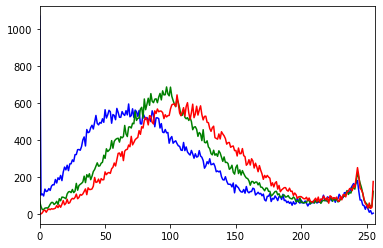

In [83]:
#trying to get individual histograms to view color distribution within an image
import cv2 as cv
from matplotlib import pyplot as plt

monet_histograms = [[cv.calcHist([image],[i],None,[256],[0,256]) for i in range(3)] for image in monetFilenames]
im=Image.open('/Users/bensonli/CIS_3715/CIS4496-GANs-Project/Sample_Data/Raw/photo_jpg/5a384bf8d9.jpg')
im.show()
img = cv.imread('/Users/bensonli/CIS_3715/CIS4496-GANs-Project/Sample_Data/Raw/photo_jpg/5a384bf8d9.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()
